In [29]:
import os
import numpy  as np 
import warnings
warnings.filterwarnings("ignore")

import random
from random import seed
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Plot of random images from the dataset

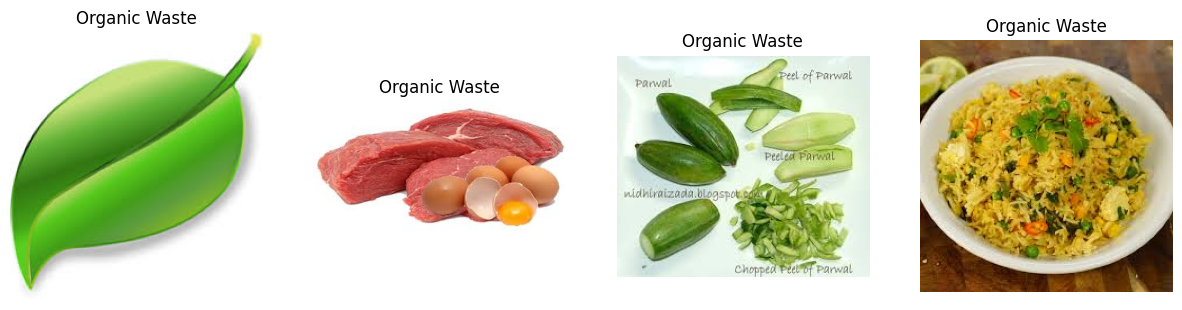

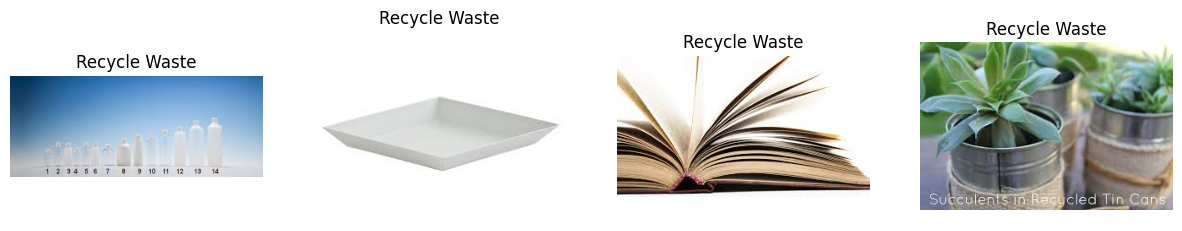

In [30]:
def plot_random_images(dataset_dir, category, num_images=4):
    # Path to the specified category directory
    category_dir = os.path.join(dataset_dir, 'TRAIN', category)
    
    # Get the list of image file names in the category directory
    image_files = os.listdir(category_dir)
    
    # Select num_images random images from the category directory
    random_images = random.sample(image_files, num_images)
    
    # Plot the random images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        # Load the image
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)
        
        # Plot the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(("Organic" if category == 'O' else "Recycle") + " Waste")  # Set the title for each image
        plt.axis('off')
    
    plt.show()

# Example usage: plot 4 random images from 'O' (Organic) and 'R' (Recyclable) categories
dataset_dir = '/kaggle/input/waste-classification-data/DATASET'
plot_random_images(dataset_dir, 'O', num_images=4)
plot_random_images(dataset_dir, 'R', num_images=4)

In [31]:
train_directory = '/kaggle/input/waste-classification-data/DATASET/TRAIN'
test_directory = '/kaggle/input/waste-classification-data/DATASET/TEST'

In [32]:
train_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True
)

validation_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

test_data_generator = ImageDataGenerator(
    #rescale = 1./255,
    preprocessing_function=preprocess_input
)

In [33]:
train_generator = train_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="training",
    seed = 43
)

Found 18052 images belonging to 2 classes.


In [34]:
validation_generator = validation_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="validation",
    seed = 43
)

Found 4512 images belonging to 2 classes.


In [35]:
test_generator = test_data_generator.flow_from_directory(
    test_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True
)

Found 2513 images belonging to 2 classes.


In [36]:

core = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
core.trainable = False


model = Sequential([
    core,
    Flatten(),
    Dense(100, activation="relu"),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])


earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)


checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)


history = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[earlystopping, checkpoint])

Epoch 1/15


W0000 00:00:1712394468.517313     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


116/142 ━━━━━━━━━━━━━━━━━━━━ 24s 946ms/step - accuracy: 0.8069 - loss: 1.0964

W0000 00:00:1712394577.617270     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.8142 - loss: 1.0090

W0000 00:00:1712394596.694049     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.92642, saving model to model_checkpoint.keras


W0000 00:00:1712394606.947933     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


142/142 ━━━━━━━━━━━━━━━━━━━━ 151s 983ms/step - accuracy: 0.8145 - loss: 1.0061 - val_accuracy: 0.9264 - val_loss: 0.2066
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.8915 - loss: 0.3120
Epoch 2: val_accuracy improved from 0.92642 to 0.92996, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 145s 978ms/step - accuracy: 0.8915 - loss: 0.3119 - val_accuracy: 0.9300 - val_loss: 0.2118
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9077 - loss: 0.2502
Epoch 3: val_accuracy improved from 0.92996 to 0.93063, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 145s 974ms/step - accuracy: 0.9077 - loss: 0.2501 - val_accuracy: 0.9306 - val_loss: 0.2133
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.9172 - loss: 0.2252
Epoch 4: val_accuracy improved from 0.93063 to 0.93218, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9172 - loss: 0.2251 - val_accura

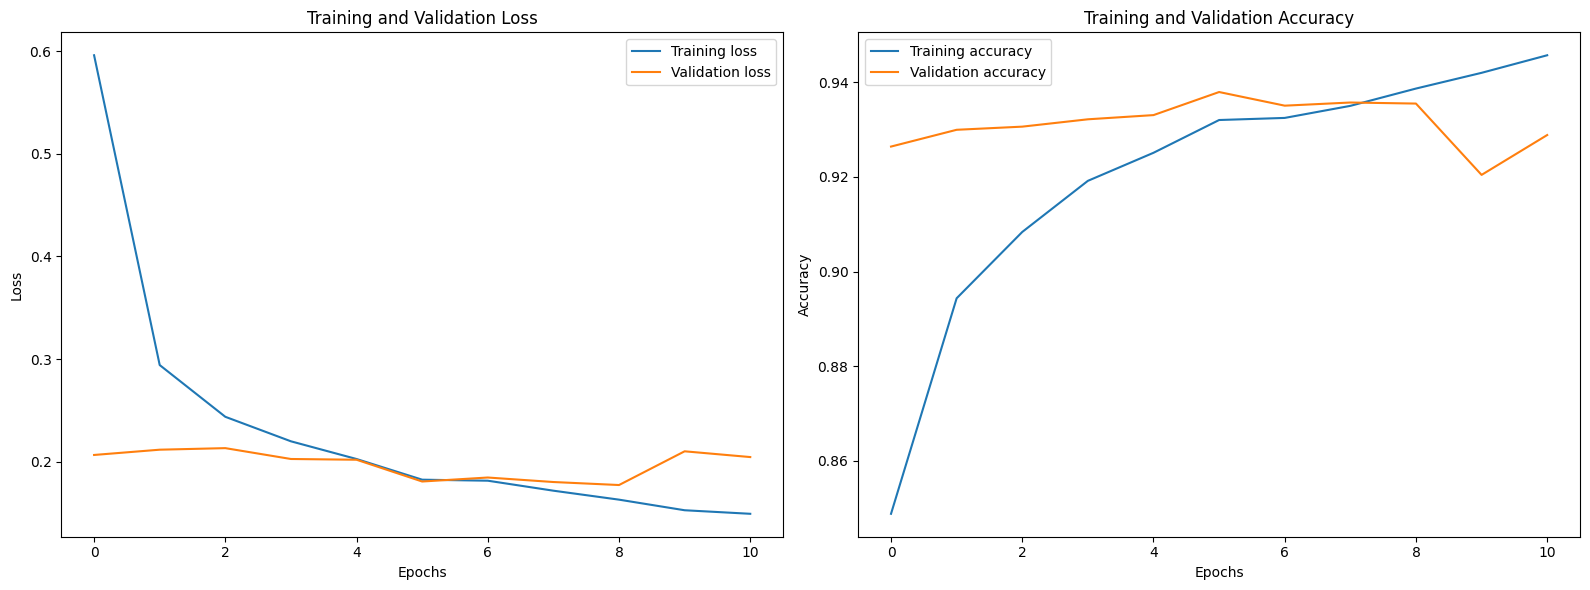

In [37]:
import matplotlib.pyplot as plt

def plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(12, 5)):
 
    num_metrics = len(metrics)
    plt.figure(figsize=figsize)
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, num_metrics, i)
        plt.plot(history.epoch, history.history[metric], label='Training ' + metric)
        plt.plot(history.epoch, history.history['val_' + metric], label='Validation ' + metric)
        plt.title('Training and Validation ' + metric.capitalize())
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(16, 6))


In [38]:
evaluation = model.evaluate(test_generator)
print(f'test Loss: {evaluation[0]:.4f}')
print(f'test Accuracy: {evaluation[1] * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.8967 - loss: 0.3181
test Loss: 0.3291
test Accuracy: 90.29%


W0000 00:00:1712396063.899953     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
